## Imports

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Load Data

In [92]:
orders = pd.read_csv("./Data/order.csv", header=0, index_col=0)
products = pd.read_csv("./Data/product.csv", header=0, index_col=0, 
    dtype={
        'category': 'str',
        'collection': 'str',
        'color': 'str',
        'metal': 'str',  # Specify types explicitly if needed
    }
)

## First view

In [93]:
display(orders.head(3))
display(products.head(3))

,order_id,sellout_date,consumer_id,quantity,net_value_dkk,store_id,store_type,product_id_with_size
0,de0fbd052164054f6aa62a14625337b0,2023-12-27,NaN,1,590.45,6c8f91e81311301bdfc31c68e6ea2643,Shop In Shop,d307ea27829de6c0493d8b20a94506d9
1,64bede113cd02f8497ddeaacac18835e,2023-06-26,NaN,1,559.04,c9c0aff4a85fc94c618b692817050846,Shop In Shop,63c7b0a952129ef1160c2a867b090cbf
2,ebf46c3554707c805de743b3a61151ff,2023-10-05,NaN,1,299.47,ba675792158e38a9bd33cdc0423883a7,Shop In Shop,770c44d919873b4ba94d44d7111f2684


,product_id_with_size,product_id,category,collection,color,metal,theme
0,d76e06a9b00623337577fb72771a481f,a53f0b462ce67ce8a78eee97c09f3ac0,26,18,111,23,NaN
1,da3b9e7fac023b0fcae1ab482f305c58,1215d9f29f80d692efe96e3e938422fc,26,29,35,6,NaN
2,bc22b32ec2d8d65885ada9cb97a52b27,1215d9f29f80d692efe96e3e938422fc,26,29,35,6,NaN


## Orders

In [94]:
print("Shape")
display(orders.shape)
print()

print("Info")
orders.info()
print()

print("Describe")
display(orders.describe())
print()

print("Nulls")
display(orders.isnull().sum())
print()

print("correlations")
for tmp_cor in ["pearson", "kendall"]:
    display(orders[["quantity", "net_value_dkk"]].corr(method=tmp_cor))
print()

Shape


(916074, 8)


Info
<class 'pandas.core.frame.DataFrame'>
Index: 916074 entries, 0 to 916073
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              916074 non-null  object 
 1   sellout_date          916074 non-null  object 
 2   consumer_id           651487 non-null  object 
 3   quantity              916074 non-null  int64  
 4   net_value_dkk         916074 non-null  float64
 5   store_id              916074 non-null  object 
 6   store_type            916074 non-null  object 
 7   product_id_with_size  916074 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.9+ MB

Describe


,quantity,net_value_dkk
count,916074.000000,916074.000000
mean,0.906210,336.574564
std,0.444543,283.156342
min,-2.000000,-1500.000000
25%,1.000000,243.340000
50%,1.000000,351.500000
75%,1.000000,500.150000
max,17.000000,3799.940000



Nulls


order_id                     0
sellout_date                 0
consumer_id             264587
quantity                     0
net_value_dkk                0
store_id                     0
store_type                   0
product_id_with_size         0
dtype: int64


correlations


,quantity,net_value_dkk
quantity,1.000000,0.674678
net_value_dkk,0.674678,1.000000


,quantity,net_value_dkk
quantity,1.000000,0.305276
net_value_dkk,0.305276,1.000000


## Products

In [95]:
print("Shape")
display(products.shape)
print()

print("Info")
products.info()
print()

print("Describe")
display(products.describe())
print()

print("Nulls")
display(products.isnull().sum())
print()

Shape


(4993, 7)


Info
<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4992
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id_with_size  4993 non-null   object
 1   product_id            4993 non-null   object
 2   category              4993 non-null   object
 3   collection            4993 non-null   object
 4   color                 4965 non-null   object
 5   metal                 4964 non-null   object
 6   theme                 2318 non-null   object
dtypes: object(7)
memory usage: 312.1+ KB

Describe


,product_id_with_size,product_id,category,collection,color,metal,theme
count,4993,4993,4993,4993,4965,4964,2318
unique,4993,2412,13,13,166,16,11
top,c5b78befc1ffe6069262861e3a586c6e,86fa52991f8acbc25b8db56ff6df68d2,26,23,35,4,Symbols and Colours
freq,1,11,2363,2521,2172,3354,563



Nulls


product_id_with_size       0
product_id                 0
category                   0
collection                 0
color                     28
metal                     29
theme                   2675
dtype: int64

## Final Dataset (with all info)

In [113]:
final_df = orders.merge(products, on="product_id_with_size", how="left")
final_df.head(3)

,order_id,sellout_date,consumer_id,quantity,net_value_dkk,store_id,store_type,product_id_with_size,product_id,category,collection,color,metal,theme
0,de0fbd052164054f6aa62a14625337b0,2023-12-27,NaN,1,590.45,6c8f91e81311301bdfc31c68e6ea2643,Shop In Shop,d307ea27829de6c0493d8b20a94506d9,d307ea27829de6c0493d8b20a94506d9,2,23,184,4,Sparkle
1,64bede113cd02f8497ddeaacac18835e,2023-06-26,NaN,1,559.04,c9c0aff4a85fc94c618b692817050846,Shop In Shop,63c7b0a952129ef1160c2a867b090cbf,750bdb10fdc6a8e45b1f83efe33e1960,6,29,192,4,NaN
2,ebf46c3554707c805de743b3a61151ff,2023-10-05,NaN,1,299.47,ba675792158e38a9bd33cdc0423883a7,Shop In Shop,770c44d919873b4ba94d44d7111f2684,770c44d919873b4ba94d44d7111f2684,2,2,35,1,NaN


## Negative and nulls 

In [69]:
final_df[
    (final_df["quantity"]>0) &
    (final_df["net_value_dkk"]<0)
].groupby(["collection", "color", "metal", "theme", "store_type"], dropna=False).agg(
    n_rows = pd.NamedAgg(column="order_id", aggfunc="count")
).reset_index()

,collection,color,metal,theme,store_type,n_rows
0,12,NaN,NaN,NaN,Concept Store,4
1,18,35,6,NaN,Shop In Shop,1
2,23,111,4,Family and Friends,Shop In Shop,2
3,23,111,4,Love,Shop In Shop,2
4,23,111,4,Occasions to Celebrate,Shop In Shop,1
5,23,111,4,NaN,Concept Store,23
6,23,151,4,Travel and Hobbies,Shop In Shop,1
7,23,163,4,Nature and Celestial,Concept Store,1
8,23,163,4,Symbols and Colours,Shop In Shop,1
9,23,163,4,Travel and Hobbies,Shop In Shop,1


In [70]:
tmp_df = final_df.copy()
tmp_df.loc[:,"consumer_id_is_null"] = tmp_df["consumer_id"].isnull()
tmp_df.loc[:,"product_id_is_null"] = tmp_df["product_id"].isnull()
tmp_df.loc[:,"quantity_is_negative"] = tmp_df["quantity"]<0
display(
    tmp_df.groupby(["quantity_is_negative","product_id_is_null","consumer_id_is_null","store_type"], dropna=False).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)
display(
    tmp_df.groupby(["quantity_is_negative","store_type"], dropna=False).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)
display(
    tmp_df.groupby(["product_id_is_null","quantity"], dropna=False).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)
display(
    tmp_df.groupby(["consumer_id_is_null","store_type"], dropna=False).agg(
        total_rows=pd.NamedAgg(column='order_id', aggfunc='count')
    ).reset_index()
)


,quantity_is_negative,product_id_is_null,consumer_id_is_null,store_type,total_rows
0,False,False,False,Concept Store,304543
1,False,False,False,Online,258887
2,False,False,True,Concept Store,238167
3,False,False,True,Online,135
4,False,False,True,Shop In Shop,2263
5,False,True,False,Concept Store,4506
6,False,True,False,Online,58433
7,False,True,True,Concept Store,3640
8,False,True,True,Online,33
9,False,True,True,Shop In Shop,4


,quantity_is_negative,store_type,total_rows
0,False,Concept Store,550856
1,False,Online,317488
2,False,Shop In Shop,2267
3,True,Concept Store,45312
4,True,Shop In Shop,151


,product_id_is_null,quantity,total_rows
0,False,-2,4
1,False,-1,45420
2,False,1,799666
3,False,2,3851
4,False,3,368
5,False,4,57
6,False,5,45
7,False,7,4
8,False,10,3
9,False,17,1


,consumer_id_is_null,store_type,total_rows
0,False,Concept Store,334167
1,False,Online,317320
2,True,Concept Store,262001
3,True,Online,168
4,True,Shop In Shop,2418


- negative = Returned/refunds
- negative net_value and positive quantity = discounts?
- null product_id = perhaps a special product (gift cards or something else?)
- null consumer_id = not-members (?). The majority (~99%) of them come form Concept Store

## Consumers

In [71]:
df = orders[orders["consumer_id"].notnull()]
df = df.groupby(["consumer_id"], dropna=False).agg(
    order_count = pd.NamedAgg(column="order_id", aggfunc="nunique"),
    sellout_date_count = pd.NamedAgg(column="sellout_date", aggfunc="nunique")
).reset_index()
q1 = df["order_count"].quantile(0.002)
q3 = df["order_count"].quantile(0.998)
df["order_count"] = df["order_count"].clip(lower=q1, upper=q3)
q3 = df["sellout_date_count"].quantile(0.998)
df["sellout_date_count"] = df["sellout_date_count"].clip(upper=q3)
df = df.groupby(["sellout_date_count","order_count"]).count().reset_index()
df["consumer_id_pct"] = round(100*(df["consumer_id"]/orders[orders["consumer_id"].notnull()]["consumer_id"].nunique()),2)
df

,sellout_date_count,order_count,consumer_id,consumer_id_pct
0,1,1,304253,95.35
1,1,2,298,0.09
2,1,3,1,0.00
3,2,2,12780,4.01
4,2,3,51,0.02
5,3,3,1691,0.53


- consumers prefer to make their purchases in a single order (+95%)
- consumers prefer to make their purchases in a single day (+95%)

## Product collection, color, metal, theme    

In [90]:
for cl in ["collection", "color", "metal", "theme"]:
    tmp_df = final_df.groupby([cl], dropna=False).agg(
        dist_consumers = pd.NamedAgg(column="consumer_id", aggfunc="nunique"),
        dist_order = pd.NamedAgg(column="order_id", aggfunc="nunique"),
        purchases = pd.NamedAgg(column="order_id", aggfunc="count"),
        items = pd.NamedAgg(column="product_id_with_size", aggfunc="size")
    ).reset_index()
    tmp_df["items_pct"] = round(100*tmp_df["items"]/final_df.shape[0],2)
    tmp_df = tmp_df.sort_values(by=["purchases", "dist_order", "dist_consumers"], 
                ascending=[False, False, False])


    display(
        tmp_df
    )

,collection,dist_consumers,dist_order,purchases,items,items_pct
5,23,234618,363005,589279,589279,64.33
7,29,61290,95020,125379,125379,13.69
13,NaN,42870,46864,66655,66655,7.28
2,18,18835,25248,41229,41229,4.50
1,16,19758,26643,33099,33099,3.61
9,41,15283,22372,25263,25263,2.76
12,8,7139,9649,12304,12304,1.34
0,12,6030,10925,11322,11322,1.24
11,49,4417,5733,6179,6179,0.67
4,22,1946,3241,3349,3349,0.37


,color,dist_consumers,dist_order,purchases,items,items_pct
131,35,151083,230043,299630,299630,32.71
8,111,119238,177999,241143,241143,26.32
166,NaN,54282,65724,87505,87505,9.55
36,163,36034,51567,59876,59876,6.54
52,192,31878,45124,50935,50935,5.56
...,...,...,...,...,...,...
62,203,0,1,1,1,0.00
113,285,0,1,1,1,0.00
116,290,0,1,1,1,0.00
154,81,0,1,1,1,0.00


,metal,dist_consumers,dist_order,purchases,items,items_pct
12,4,284605,442043,725554,725554,79.20
16,NaN,54336,65793,87582,87582,9.56
4,15,22407,33440,44558,44558,4.86
3,13,17122,24730,27565,27565,3.01
14,6,12669,17956,23337,23337,2.55
9,24,2014,2714,2940,2940,0.32
1,1,2069,2651,2797,2797,0.31
8,23,377,482,553,553,0.06
6,17,169,297,327,327,0.04
5,16,240,308,319,319,0.03


,theme,dist_consumers,dist_order,purchases,items,items_pct
11,NaN,190778,278604,437120,437120,47.72
8,Symbols and Colours,70787,103841,123916,123916,13.53
1,Family and Friends,50860,72842,83559,83559,9.12
2,Love,44788,67221,77191,77191,8.43
3,Nature and Celestial,27703,39684,45616,45616,4.98
0,Animals and Pets,26155,36652,41303,41303,4.51
10,Wish,18525,28504,36720,36720,4.01
4,Occasions to Celebrate,21425,30061,33098,33098,3.61
9,Travel and Hobbies,7870,15243,18071,18071,1.97
6,Regal,6260,10150,11212,11212,1.22


In [31]:
final_df[final_df["quantity"]>0][["quantity","net_value_dkk"]].describe()

,quantity,net_value_dkk
count,870611.000000,870611.000000
mean,1.005756,380.428771
std,0.090878,209.189830
min,1.000000,-92.190000
25%,1.000000,250.370000
50%,1.000000,354.640000
75%,1.000000,508.860000
max,17.000000,3799.940000


## Timeseries

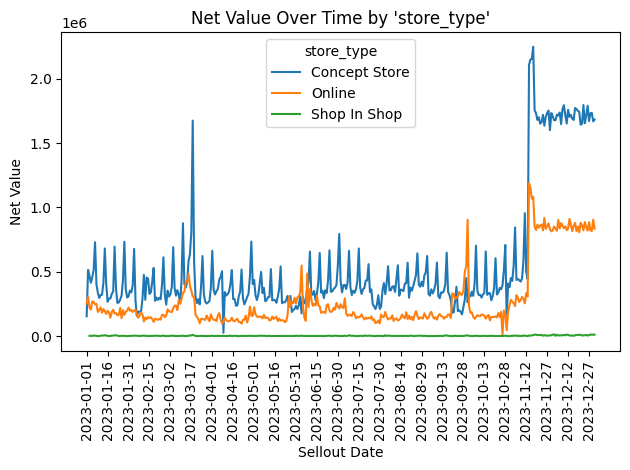

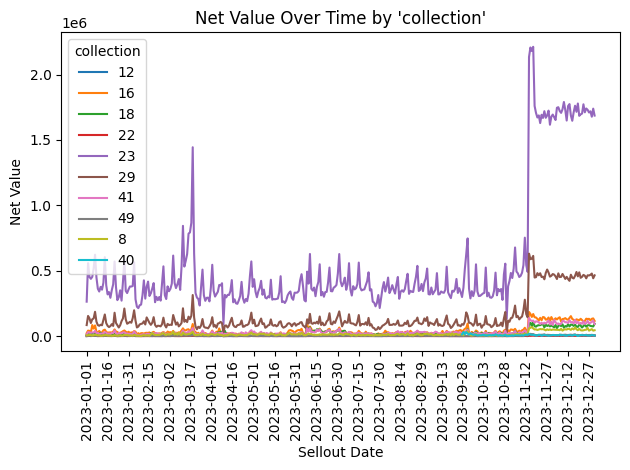

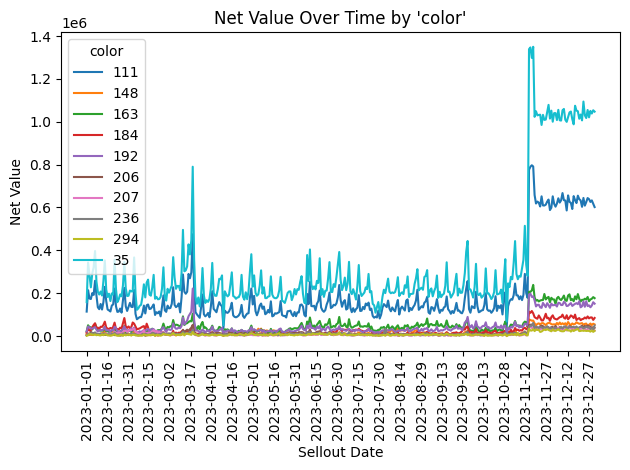

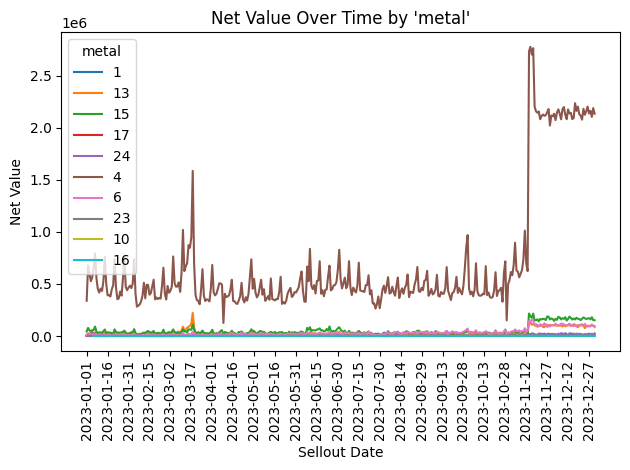

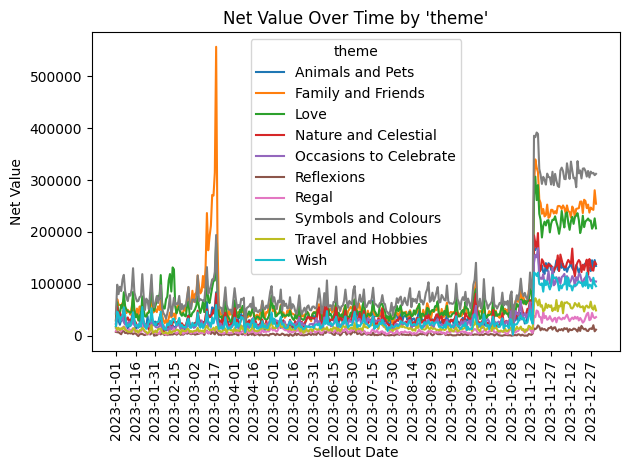

In [22]:
for cl in ["store_type", "collection", "color", "metal", "theme"]:
    top_10 = final_df.groupby([cl]).agg(
        net_value=pd.NamedAgg(column="net_value_dkk", aggfunc="sum")
    ).nlargest(10, columns="net_value").reset_index()
    top_10 = top_10[cl]

    tmp_df = final_df[final_df[cl].isin(top_10)]
    tmp_df = tmp_df.groupby(["sellout_date",cl]).agg(
        net_value=pd.NamedAgg(column="net_value_dkk", aggfunc="sum")
    )
    tmp_df = tmp_df.sort_values(by=["sellout_date", cl], ascending=[True, True])
    sns.lineplot(data=tmp_df, x="sellout_date", y="net_value", hue=cl)
    # plt.xticks(rotation=45)
    plt.xticks(ticks=plt.xticks()[0][::15], rotation=90)
    plt.title(f"Net Value Over Time by '{cl}'")
    plt.xlabel("Sellout Date")
    plt.ylabel("Net Value")
    plt.tight_layout()
    plt.show()

- 19-03-2023, March (UK mother's day?)
- 2023-11-14 (before christmas?)

## Missing Consumer_id vs sellout_date

In [30]:
total_rows = orders[
    (orders["consumer_id"].isnull()) &
    (orders["sellout_date"]<'2023-11-14') &
    (orders["sellout_date"]!='2023-03-18')
]["product_id_with_size"].count()

In [31]:
tmp_df = orders.copy()

tmp_df = tmp_df[
    (orders["consumer_id"].isnull()) &
    (orders["sellout_date"]<'2023-11-14') &
    (orders["sellout_date"]!='2023-03-18')
]

tmp_df = tmp_df.groupby("sellout_date").agg(
    null_consumer_id_count=pd.NamedAgg(column='product_id_with_size', aggfunc='count')
).reset_index()

tmp_df['day_of_week'] = pd.to_datetime(tmp_df['sellout_date']).dt.day_name()

tmp_df = tmp_df.groupby("day_of_week").agg(
    null_consumer_id_count=('null_consumer_id_count', 'sum'),
    null_consumer_id_mean=('null_consumer_id_count', 'mean'),
    null_consumer_id_std=('null_consumer_id_count', 'std')
).reset_index()

tmp_df["null_consumer_id_count_pct"] = round(100*tmp_df["null_consumer_id_count"]/total_rows, 2)

tmp_df = tmp_df.sort_values(by="null_consumer_id_count", ascending=False)
tmp_df

,day_of_week,null_consumer_id_count,null_consumer_id_mean,null_consumer_id_std,null_consumer_id_count_pct
2,Saturday,33218,754.954545,206.056885,21.62
0,Friday,23702,526.711111,169.439399,15.42
4,Thursday,19988,444.177778,140.725602,13.01
1,Monday,19509,424.108696,146.667913,12.69
5,Tuesday,19440,432.000000,146.563204,12.65
3,Sunday,18998,413.000000,138.007246,12.36
6,Wednesday,18822,418.266667,135.743307,12.25


- busy days means more missings? (reasonable)

## Basket Analysis

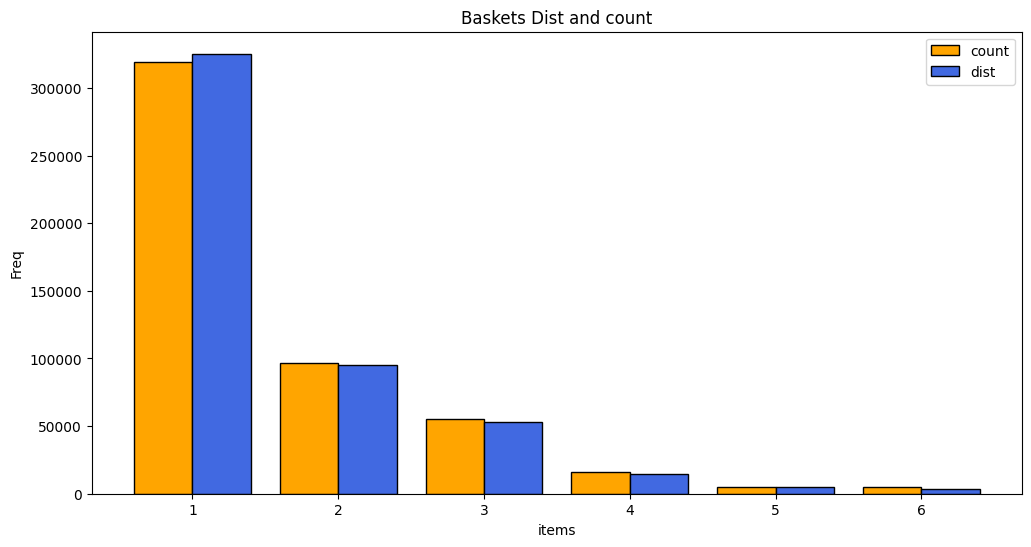

In [61]:
df = final_df[(final_df["quantity"] > 0) & (final_df["product_id"].notnull())].groupby("order_id", dropna=False).agg(
    count_items=pd.NamedAgg(column="product_id", aggfunc="size"),
    dist_items=pd.NamedAgg(column="product_id", aggfunc="nunique")
).reset_index()

q1 = df["count_items"].quantile(0.995)
df["count_items"] = df["count_items"].clip(upper=q1)

q2 = df["dist_items"].quantile(0.995)
df["dist_items"] = df["dist_items"].clip(upper=q2)

df1 = df.groupby(["count_items"], dropna=False).agg(
    count_freq=pd.NamedAgg(column="order_id", aggfunc="size")
).reset_index()
df1 = df1.rename(columns={"count_items":"items"})

df2 = df.groupby(["dist_items"], dropna=False).agg(
    dist_freq=pd.NamedAgg(column="order_id", aggfunc="size")
).reset_index()
df2 = df2.rename(columns={"dist_items":"items"})

merged_df = pd.merge(df1, df2, on="items", how="outer").fillna(0)

x = merged_df["items"]
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, merged_df["count_freq"], width=width, label="count", color='orange', edgecolor='black')
plt.bar(x + width / 2, merged_df["dist_freq"], width=width, label="dist", color='royalblue', edgecolor='black')
plt.xlabel('items')
plt.ylabel('Freq')
plt.title('Baskets Dist and count')
plt.xticks(x)
plt.legend()
plt.grid(False)
plt.show()

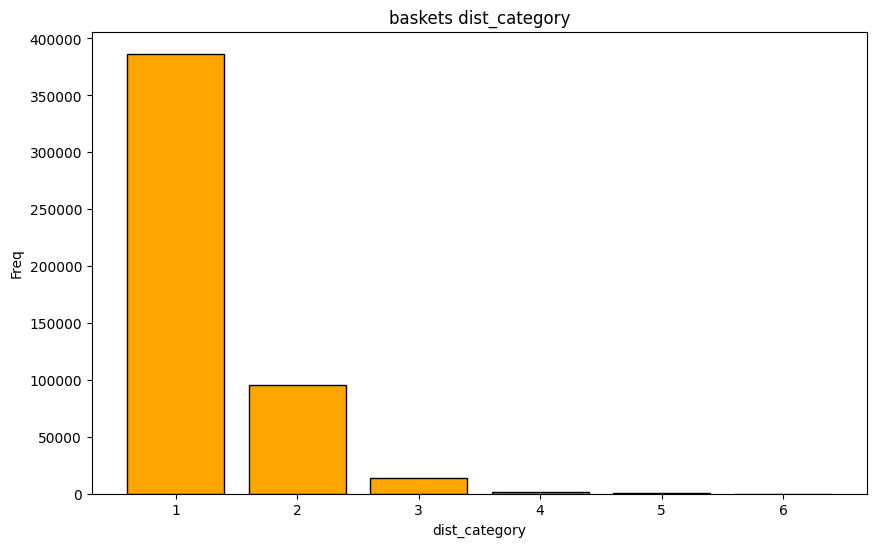

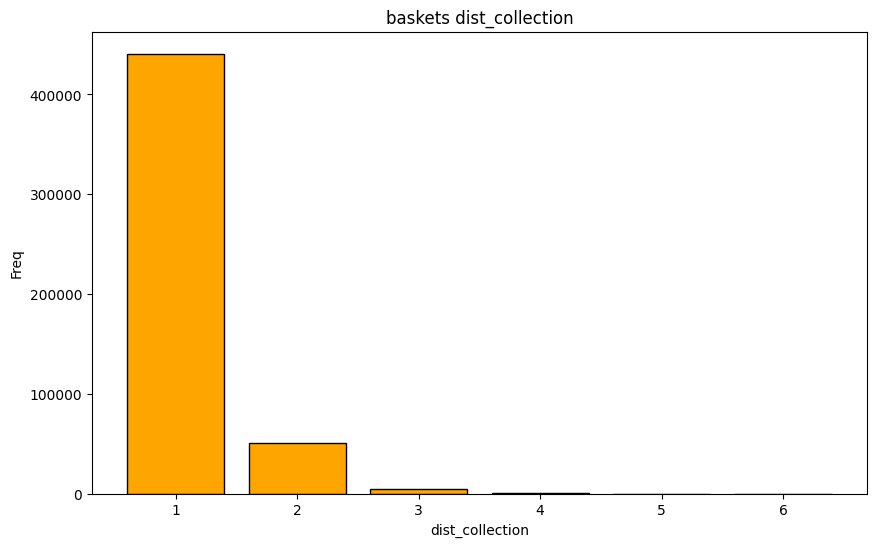

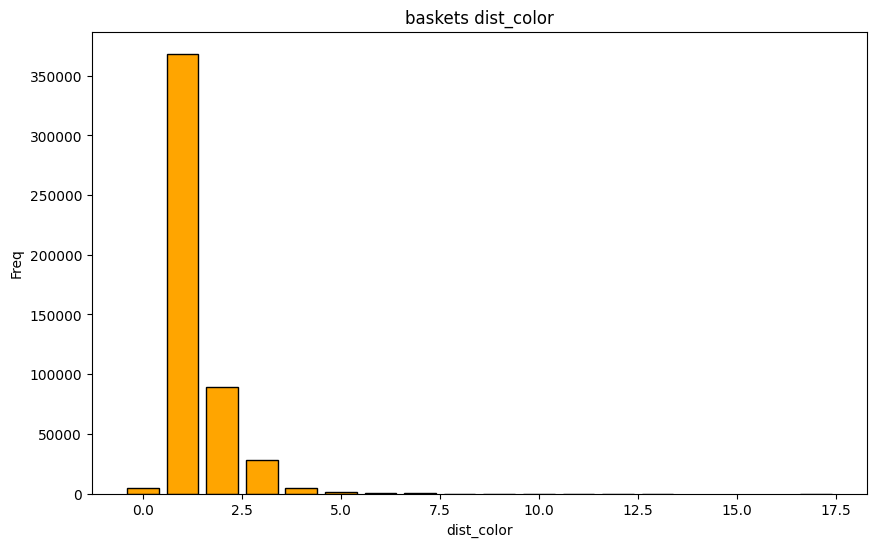

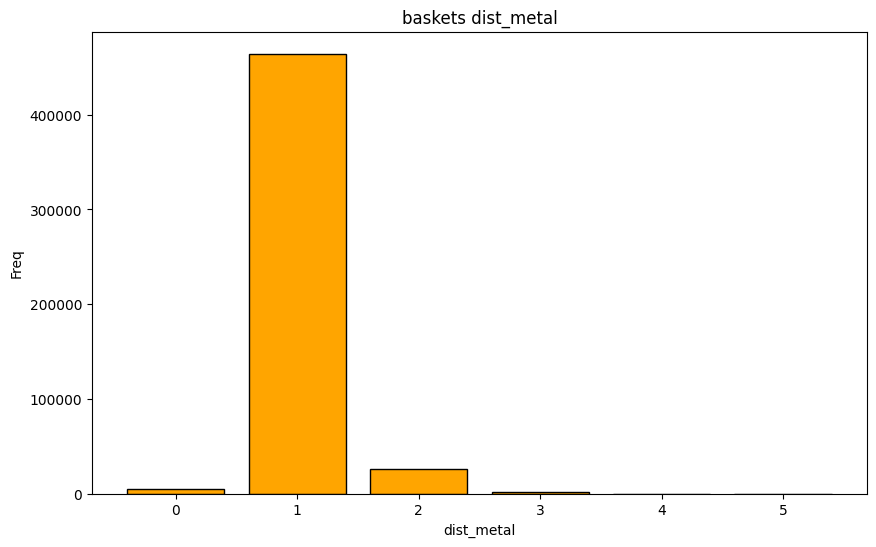

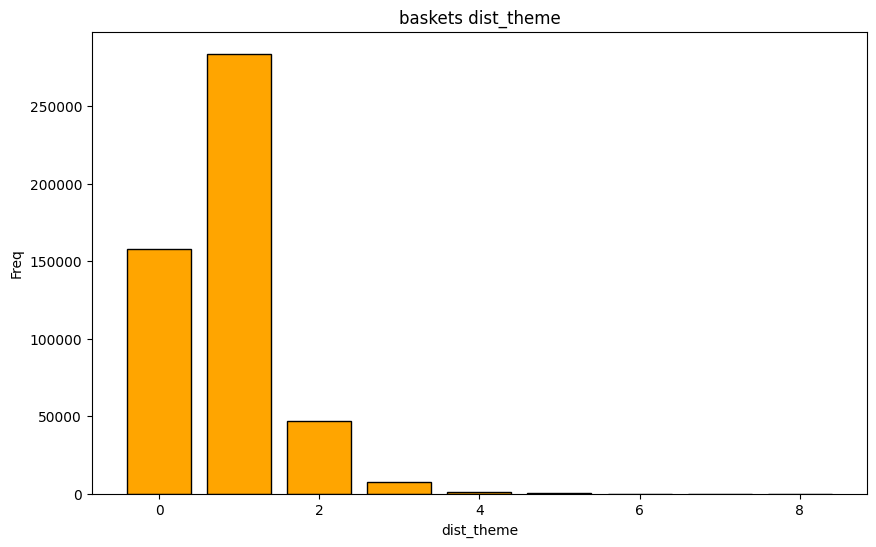

In [62]:
for cl in ["category", "collection", "color", "metal", "theme"]:

    df = final_df[(final_df["quantity"]>0) & (final_df["product_id"].notnull())].groupby("order_id", dropna=False).agg(
        dist_items = pd.NamedAgg(column=cl, aggfunc="nunique")
    ).reset_index()

    # q = df["dist_items"].quantile(0.995)

    # df["dist_items"] = df["dist_items"].clip(upper=q)

    df = df.groupby("dist_items", dropna=False).agg(
        freq = pd.NamedAgg(column="order_id", aggfunc="size")
    ).reset_index()

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(df["dist_items"], df["freq"], color='orange', edgecolor='black')
    plt.xlabel(f'dist_{cl}')
    plt.ylabel('Freq')
    plt.title(f'baskets dist_{cl}')
    plt.grid(False)
    plt.show()